 # <font color=red>Regression - Rakam Tahminleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 96.5/96.5 kB 1.4 MB/s eta 0:00:00


In [4]:
df=pd.read_excel("cars.xls")

In [5]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df.tail() #son 5 satiri gösterir

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [7]:
df.info

<bound method DataFrame.info of             Price  Mileage    Make     Model           Trim   Type  Cylinder  \
0    17314.103129     8221   Buick   Century       Sedan 4D  Sedan         6   
1    17542.036083     9135   Buick   Century       Sedan 4D  Sedan         6   
2    16218.847862    13196   Buick   Century       Sedan 4D  Sedan         6   
3    16336.913140    16342   Buick   Century       Sedan 4D  Sedan         6   
4    16339.170324    19832   Buick   Century       Sedan 4D  Sedan         6   
..            ...      ...     ...       ...            ...    ...       ...   
799  16507.070267    16229  Saturn  L Series  L300 Sedan 4D  Sedan         6   
800  16175.957604    19095  Saturn  L Series  L300 Sedan 4D  Sedan         6   
801  15731.132897    20484  Saturn  L Series  L300 Sedan 4D  Sedan         6   
802  15118.893228    25979  Saturn  L Series  L300 Sedan 4D  Sedan         6   
803  13585.636802    35662  Saturn  L Series  L300 Sedan 4D  Sedan         6   

     Li

In [8]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
df.corr()  #hangi sütunun hangi sütuna ne kadar bağlı onu görüyoruz. 
#kapı sayısı arttıkça fiyatı düşüyor. ters ilişki var
#corr 0.20 alıyoruz 0.90 üzerinde çıkmışsa o zaman işimiz biraz daha değişiyor. veri kendisini bir şekilde tekrar etmiş oluyor.
#cylinder 'ı almazdık. 0.95
#0.20 altını da katkısı olmadığı için 
#hedefimizde çok az sütunla uğraşmak istiyoruz

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [10]:
df.shape

(804, 12)

In [11]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [12]:
df["Make"].nunique()

6

In [13]:
df["Make"].value_counts() # hangisinden kaç tane var ?

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [15]:
df["Make"].value_counts(normalize=True) #oran olarak görmek istersek

Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: Make, dtype: float64

In [ ]:
#Eigen Value, Eigen Vector - Öz Değerler ve Öz Vektörler

In [16]:
import seaborn as sns""

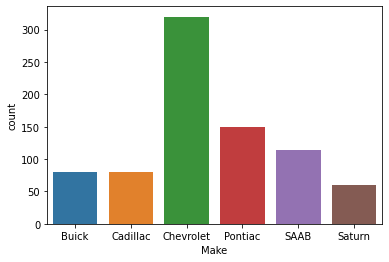

In [18]:
sns.countplot(x=df["Make"]);

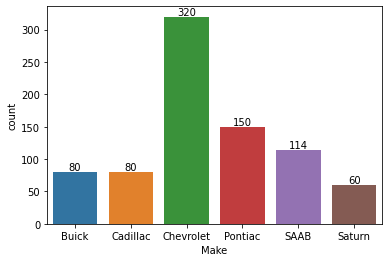

In [20]:
#bar üzerinde sayılar çıkmasını istiyorsak bu şekilde yapabiliriz.
ax=sns.countplot(x=df["Make"]);
ax.bar_label(ax.containers[0]);

<ipython-input-22-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

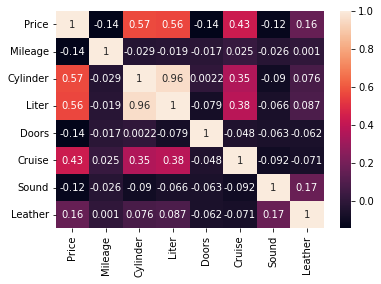

In [22]:
sns.heatmap(df.corr(), annot=True)
#annot true rakamlar yazsın diye

In [23]:
import matplotlib.pyplot as plt

<ipython-input-25-a5bd57f73938>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

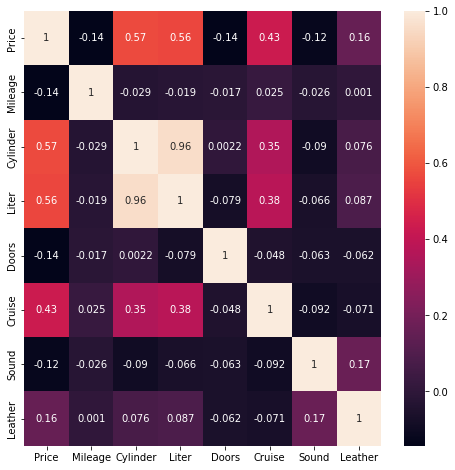

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [27]:
abs(df.corr()['Price'].sort_values(ascending=False))

   
#mutlak değer almak için


<ipython-input-27-aa8fdb4e34e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['Price'].sort_values(ascending=False))


Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [28]:
df['Doors'].value_counts()

4    614
2    190
Name: Doors, dtype: int64

<AxesSubplot: xlabel='Doors', ylabel='count'>

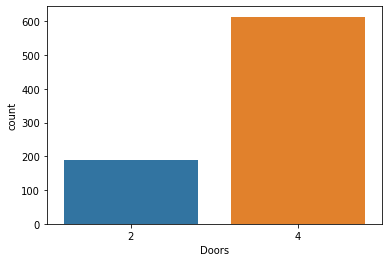

In [29]:
sns.countplot(x=df["Doors"])

In [30]:
# Feature Enginerring

In [34]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

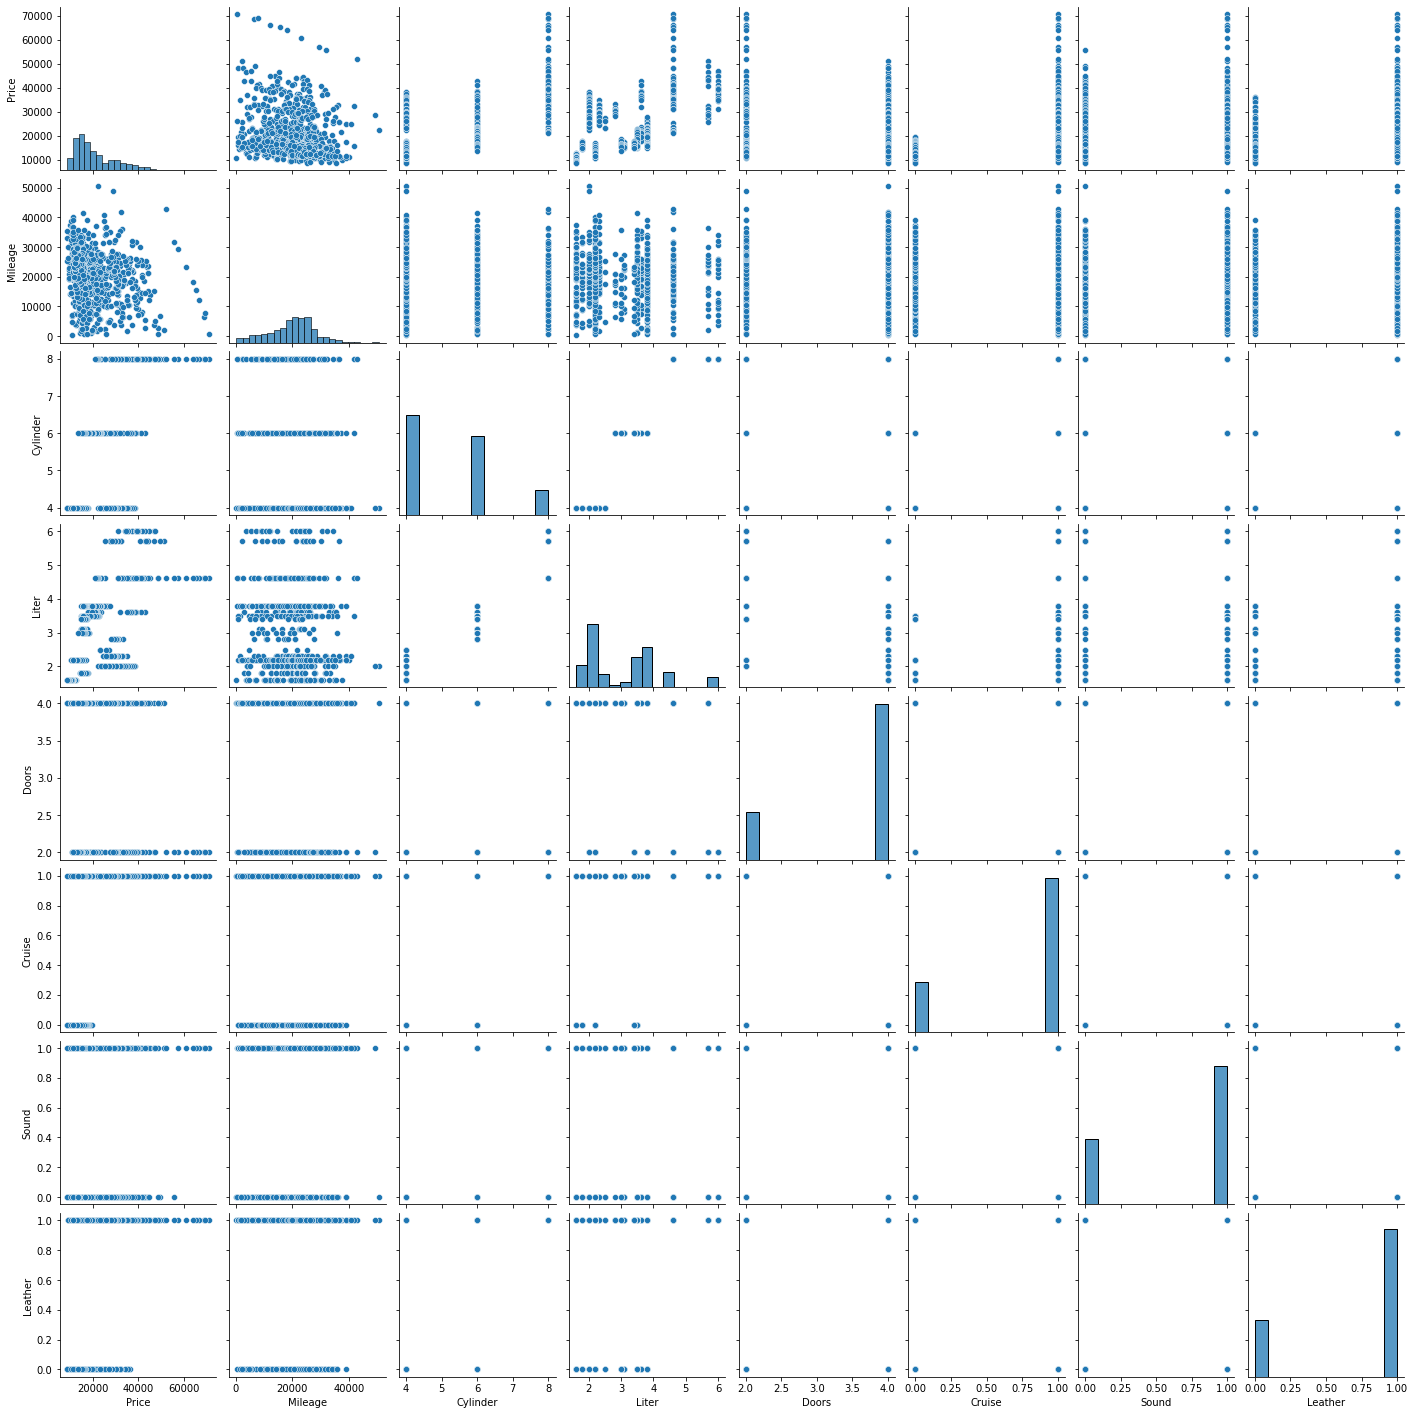

In [35]:
sns.pairplot(df);
#burada bütün sütunların diğer sütunlara göre değişimini gösterir.

## Modelling

In [38]:
x=df[["Mileage","Cylinder","Liter","Cruise"]] #tek parantez koyarsak diziye/ seriye dönüşüyor. tablo şeklinde göstermiyor. korelasyonda %90 altı ve %20 üstü olan başlıkları seçiyorum
y=df["Price"] # hedefim fiyatla olan ilişki onu y'ye eşitledim

In [39]:
x.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Cruise'], dtype='object')

In [40]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [55]:
x

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1
...,...,...,...,...
799,16229,6,3.0,1
800,19095,6,3.0,1
801,20484,6,3.0,1
802,25979,6,3.0,1


In [56]:
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [41]:
#Korelasyon çeşitleri = Pearson, Spearman, Kendall

In [68]:
## !pip install scikit-learn

In [62]:
from sklearn.model_selection import train_test_split
#Seed

In [63]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42) #%20 test içn kalanı eğitim için, aynı rakamları seçmesi için 42'yi belirliyorum ki tekrar çalıştırdığımda veriler fakrlı olmasın ve daha sonra karşılaştırma yapabileyim

In [64]:
x_train.shape,x_test.shape

((643, 4), (161, 4))

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr=LinearRegression()

In [70]:
model=lr.fit(x_train,y_train)
#modeli eğitmek için fit kullanılır.

In [71]:
tahmin=model.predict(x_test)
#eğitilen model ile kenara saklanan verileri tahmin ederiz.

In [72]:
from sklearn.metrics import r2_score, mean_squared_error

In [73]:
(mean_squared_error(tahmin,y_test))**0.5
#hata oranı

7413.255792158803

In [74]:
r2_score(tahmin,y_test)
#başarı oranı, burda başarısız olduk. çünkü marka yoktu. string ifade olduğu için. sparse matrix oluşturduk ve tekrar denedik.

-0.3671260571211752

In [77]:
x=df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]] #tek parantez koyarsak diziye/ seriye dönüşüyor. tablo şeklinde göstermiyor
#Mileage domain bilgisi
# burda tekrrar tanımladık ve marka ve trimi de aldık.
y=df[["Price"]]

In [89]:
x=pd.get_dummies(x,drop_first=True) #

In [90]:
x

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
800,19095,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
801,20484,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
802,25979,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [92]:
model=lr.fit(x_train,y_train)

In [95]:
tahmin=model.predict(x_test)

In [96]:
(mean_squared_error(tahmin,y_test))**0.5
#1523 dolar

1523.6314728711338

In [97]:
r2_score(tahmin,y_test)
#başarı oranı %97'ye çıktı

0.9717252793475156

In [98]:
from sklearn.linear_model import Ridge, Lasso
#tek bir kaynapa güvenmedik ve Ridge ve lasso algoritmalarıyla da denedik.
#Ridge karesini alıyor
#Lasso mutlak değerini alıyor

In [104]:
R=Ridge()
L=Lasso()

In [105]:
R.fit(x_train,y_train)
#modeli eğittik

Ridge()

In [106]:
tahmin2=R.predict(x_test)
#tahmin ettirdik.

In [108]:
(mean_squared_error(tahmin2,y_test))**0.5

1575.6786242840176

In [109]:
L.fit(x_train,y_train)

Lasso()

In [110]:
tahmin3=L.predict(x_test)

In [111]:
(mean_squared_error(tahmin3,y_test))**0.5

1527.043092830228

In [112]:
r2_score(tahmin3,y_test)

0.9712425418609402

In [113]:
from sklearn.linear_model import ElasticNet

In [118]:
E=ElasticNet(l1_ratio=0.8) 
#%80 Ridge %20 Lasso'dan alıyor
#Ridge ve lassoyu ayrı ayrı çalıştırmak yerine bu ikisini de çalıştırıyor

In [119]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [122]:
tahmin4=E.predict(x_test)

In [123]:
r2_score(tahmin4,y_test)

0.3971899351969109